In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001057706"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001057706
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,FIRST BANCORP /PR/
Ticker,FBP


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,50.0,9.853400e+00,6.215267e+00,2.850000e+00,6.770000e+00,8.260000e+00,9.4,3.411000e+01
interest income,52.0,1.886787e+08,5.061256e+07,1.435730e+08,1.523905e+08,1.614365e+08,216395000.0,3.058710e+08
net income,52.0,4.570308e+06,7.076079e+07,-1.652180e+08,-1.486250e+07,1.894050e+07,25803500.0,3.307780e+08
net interest income,52.0,1.220055e+08,1.138352e+07,9.425500e+07,1.171270e+08,1.245705e+08,129340750.0,1.446210e+08
provision for loan losses,52.0,5.277738e+07,5.124926e+07,7.649000e+06,2.277550e+07,3.154550e+07,59245250.0,2.351520e+08


# Plots

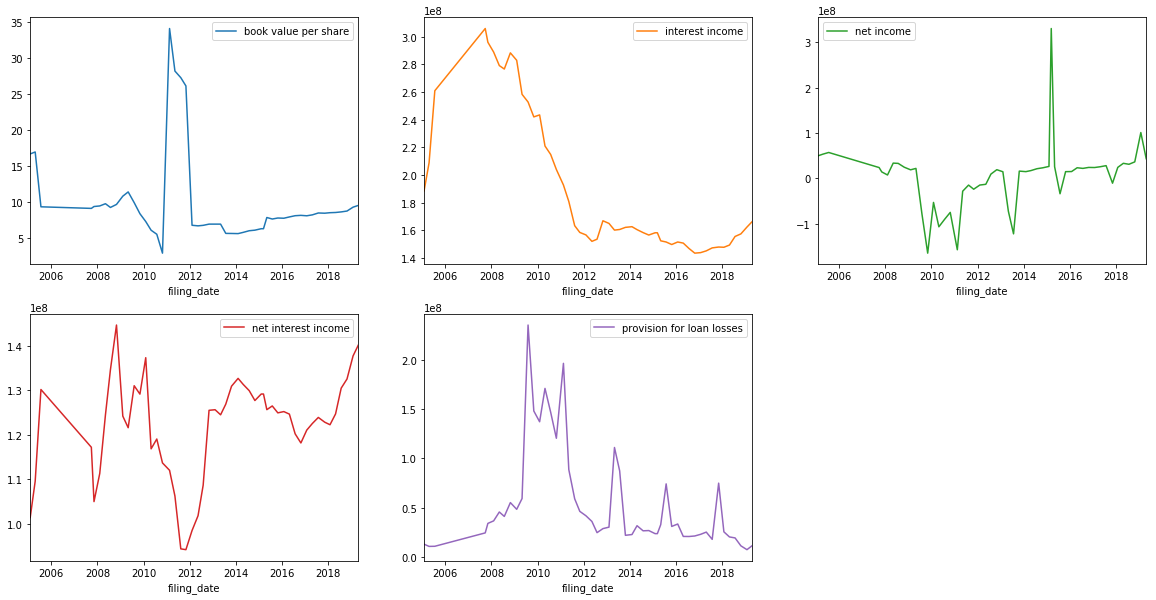

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0001057706 book value per share       2005Q3 to 2007Q1: 7 periods    missing   
           book value per share                            2013Q1    missing   
           interest income            2005Q3 to 2007Q1: 7 periods    missing   
           net income                 2005Q3 to 2007Q1: 7 periods    missing   
           net income                                      2014Q4  duplicate   
           net interest income        2005Q3 to 2007Q1: 7 periods    missing   
           provision for loan losses  2005Q3 to 2007Q1: 7 periods    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0001057706 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()